In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
# !gdown --id 1DL87v8WCs6A6PLe3MvitKItZDHk8jl0g

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1DL87v8WCs6A6PLe3MvitKItZDHk8jl0g
To: /content/PlantVillage.zip
100% 261M/261M [00:01<00:00, 220MB/s]


In [ ]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/cookiefinder/tomato-disease-multiple-sources')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Elvaretta Rizky
Your Kaggle Key: ··········


ApiException: ignored

In [ ]:
# defect files
import os

os.remove("/content/tomato-disease-multiple-sources/valid/healthy/HL_(336).png")
os.remove('/content/tomato-disease-multiple-sources/train/healthy/A-Healthy-leaves-of-tomato-plants-and-B-Leaves-of-tomato-plants-inoculated-with.png')

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
import os

val_path = '/content/tomato-disease-multiple-sources/valid'

dataset_split_path = '/content/tomato-disease-data'

splitfolders.ratio(val_path, dataset_split_path,
                   seed=42, ratio=(0.5, 0.5))

In [ ]:
os.rename('/content/tomato-disease-data/train', '/content/tomato-disease-data/test')

In [ ]:
os.rename('/content/tomato-disease-multiple-sources/train', '/content/tomato-disease-data/train')

In [ ]:
import shutil

shutil.rmtree('/content/tomato-disease-multiple-sources')

In [ ]:
import tensorflow as tf

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    directory = '/content/tomato-disease-data/train',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

val_generator = datagen.flow_from_directory(
    directory = '/content/tomato-disease-data/val',
    target_size=(256, 256),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 25850 images belonging to 11 classes.
Found 3344 images belonging to 11 classes.


In [ ]:
dense_model = tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3),
)

for layer in dense_model.layers:
    layer.trainable = False

x = dense_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(11, activation='softmax')(x)
model = tf.keras.Model(dense_model.input, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 262, 262, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), input_shape=(256, 256, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax'),
# ])

# model.summary()

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
epochs = 10

In [ ]:
model.compile(optimizer= optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=808, validation_data=val_generator, verbose=1)

Epoch 1/10
808/808 [==============================] - 147s 173ms/step - loss: 0.5206 - accuracy: 0.8225 - val_loss: 0.2650 - val_accuracy: 0.9031
Epoch 2/10
808/808 [==============================] - 134s 166ms/step - loss: 0.2609 - accuracy: 0.9086 - val_loss: 0.1878 - val_accuracy: 0.9345
Epoch 3/10
808/808 [==============================] - 138s 171ms/step - loss: 0.1839 - accuracy: 0.9346 - val_loss: 0.1517 - val_accuracy: 0.9513
Epoch 4/10
808/808 [==============================] - 133s 165ms/step - loss: 0.1519 - accuracy: 0.9460 - val_loss: 0.1360 - val_accuracy: 0.9563
Epoch 5/10
808/808 [==============================] - 137s 169ms/step - loss: 0.1139 - accuracy: 0.9602 - val_loss: 0.1155 - val_accuracy: 0.9674
Epoch 6/10
808/808 [==============================] - 137s 170ms/step - loss: 0.0979 - accuracy: 0.9653 - val_loss: 0.1251 - val_accuracy: 0.9629
Epoch 7/10
808/808 [==============================] - 134s 166ms/step - loss: 0.0847 - accuracy: 0.9707 - val_loss: 0.1305 -

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

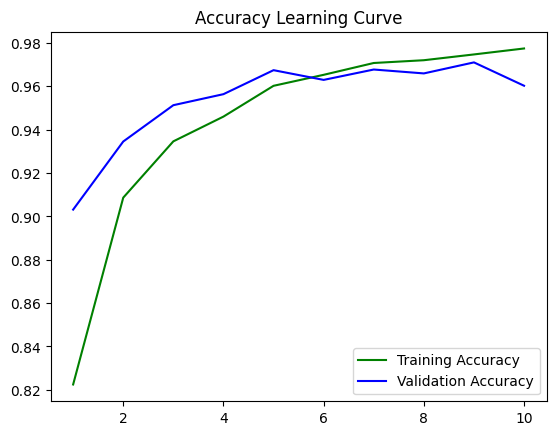

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.arange(1, epochs+1), acc, c='g', label='Training Accuracy')
plt.plot(np.arange(1, epochs+1), val_acc, c='b', label='Validation Accuracy')
plt.title('Accuracy Learning Curve')
plt.legend(loc=0)
plt.show()

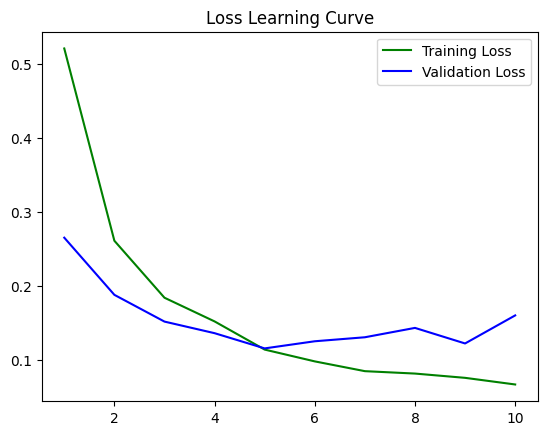

In [ ]:
plt.plot(np.arange(1, epochs+1), loss, c='g', label='Training Loss')
plt.plot(np.arange(1, epochs+1), val_loss, c='b', label='Validation Loss')
plt.title('Loss Learning Curve')
plt.legend(loc=0)
plt.show()

In [ ]:
test_generator = datagen.flow_from_directory(
    directory = '/content/tomato-disease-data/test',
    class_mode='categorical',
    shuffle=False,
    target_size=(256, 256))

Found 3339 images belonging to 11 classes.


In [ ]:
print(model.metrics_names)
model.evaluate(test_generator)

['loss', 'accuracy']
105/105 [==============================] - 19s 180ms/step - loss: 0.1381 - accuracy: 0.9632


[0.13812682032585144, 0.9631626009941101]

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving tomato-leaves-isolated-on-white-260nw-1251320371.webp to tomato-leaves-isolated-on-white-260nw-1251320371.webp


In [ ]:
test_file = list(uploaded.keys())[0]
test_path = f'/content/{test_file}'

In [ ]:
test_image = tf.keras.utils.load_img(test_path, target_size = (256, 256), color_mode='rgb')
test_array = tf.keras.utils.img_to_array(test_image)
test_array = np.array(test_array)
test_array = test_array/255
test_array_predict = np.expand_dims(test_array, axis=0)
print(test_array_predict.shape)

(1, 256, 256, 3)


In [ ]:
prediction = model.predict(test_array_predict)
print(prediction)

1/1 [==============================] - 0s 41ms/step
[[5.2199467e-10 2.8583847e-11 3.1570769e-03 4.5108044e-07 1.1059500e-06
  1.3028841e-06 5.8622351e-09 1.2994852e-08 5.0598654e-05 9.9678922e-01
  1.9303468e-07]]


[9]
healthy


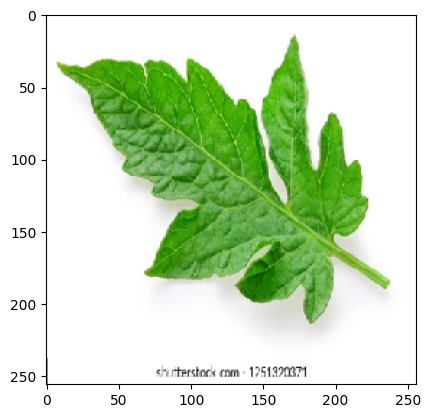

In [ ]:
pred_idx = prediction.argmax(axis=-1)
print(pred_idx)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
print(idx_to_cls[int(pred_idx)])

plt.imshow(test_array)

In [ ]:
model.save("model_tomato_densenet_kaggle_withtest.h5")

In [ ]:
model = tf.keras.models.load_model('model_tomato_densenet_kaggle_withtest.h5')

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

In [ ]:
import pathlib

tflite_model_file = pathlib.Path('model-tomato.tflite')
tflite_model_file.write_bytes(tflite_model)

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

SOURCE:
1. https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

2. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#fit

3. https://stackoverflow.com/questions/45806669/how-to-use-predict-generator-with-imagedatagenerator

4. https://stackoverflow.com/questions/56449262/how-to-upload-folders-to-google-colab

5. https://vijayabhaskar96.medium.com/hi-i-see-youre-using-test-generator-to-evaluate-the-model-what-evaluate-generator-does-is-it-6974971d8e57

6. https://androidkt.com/what-does-model-evaluate-return-keras/